In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity



import librosa
import librosa.display
import IPython.display as ipd


In [2]:
dir_ = '/Users/maram/Documents/Music-Recommendation-CNN/Data'
print(  list(os.listdir(f'{dir_}/genres_original/')) )


['pop', '.DS_Store', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']


In [15]:
y, frequency = librosa.load(f'{dir_}/genres_original/blues/blues.00027.wav')


print('Frequency', frequency, '\n')
print(y)


Frequency 22050 

[-0.02020264 -0.03634644 -0.02706909 ...  0.01159668  0.01779175
  0.04614258]


Text(0.5, 1.0, 'Sound Waves Examples')

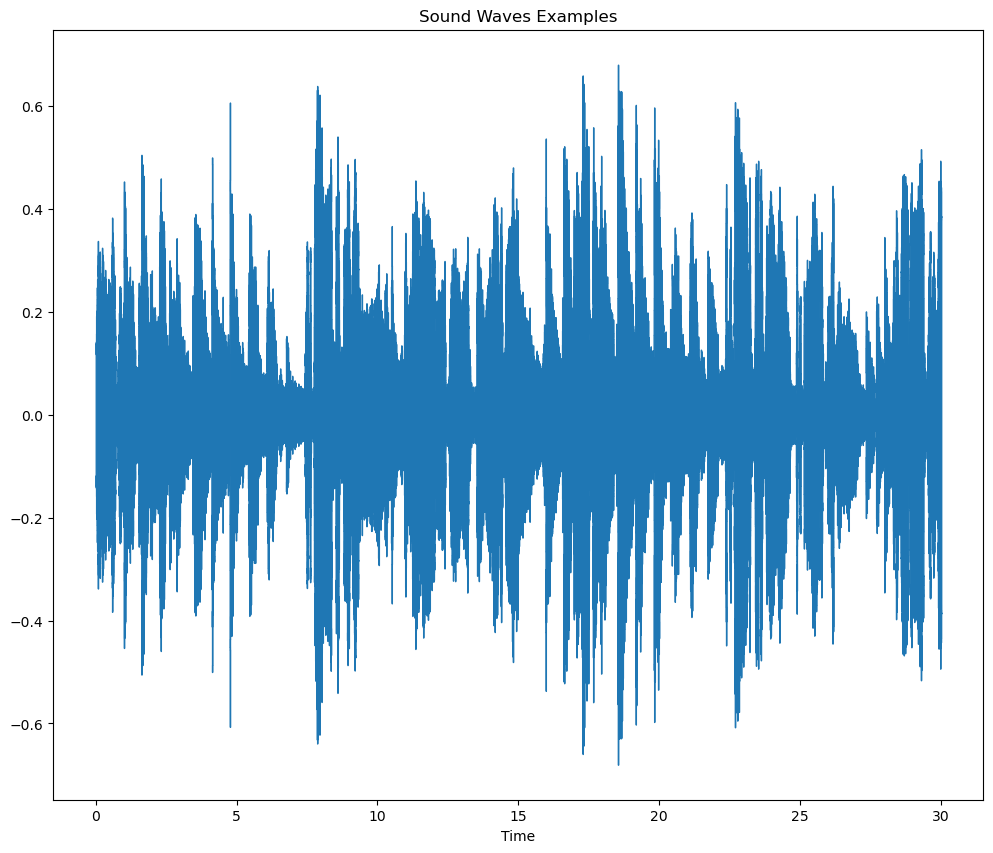

In [16]:
plt.figure(figsize = (12, 10))
librosa.display.waveshow(y = y, sr = frequency)
plt.title("Sound Waves Examples")

In [17]:
fft = 2048
hl = 512

stft = np.abs(librosa.stft(y, n_fft = fft, hop_length = hl))

print(np.shape(stft))

(1025, 1293)


In [18]:
stft

array([[1.8123595e+00, 9.5411497e-01, 5.9939897e-01, ..., 1.7821953e-01,
        1.5244678e-01, 2.1304193e+00],
       [1.7794360e+00, 1.8759724e+00, 1.5077041e+00, ..., 2.4999179e-01,
        4.0602219e-01, 2.4112763e+00],
       [1.2580146e+00, 2.7836382e+00, 2.0689771e+00, ..., 4.4144991e-01,
        7.4326664e-01, 2.7744634e+00],
       ...,
       [9.1957249e-04, 4.0843239e-04, 7.5548378e-05, ..., 2.0415094e-04,
        3.1740016e-03, 2.2225065e-02],
       [9.2596316e-04, 4.2935016e-04, 1.3720557e-04, ..., 2.8518142e-04,
        2.9723444e-03, 2.2330904e-02],
       [9.6280366e-04, 5.2711315e-04, 4.0377643e-05, ..., 1.5257535e-04,
        3.2198024e-03, 2.2445286e-02]], dtype=float32)

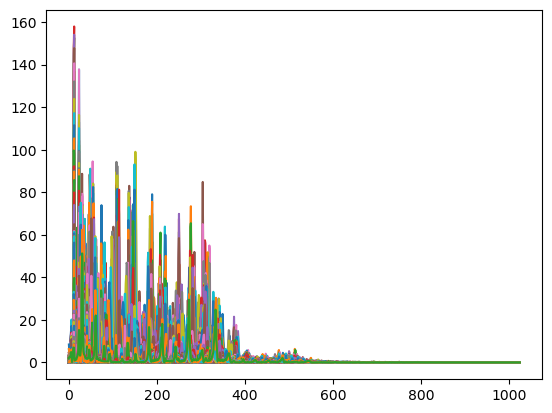

In [21]:
plt.plot(stft);

Text(0, 0.5, 'Frequency in HZ')

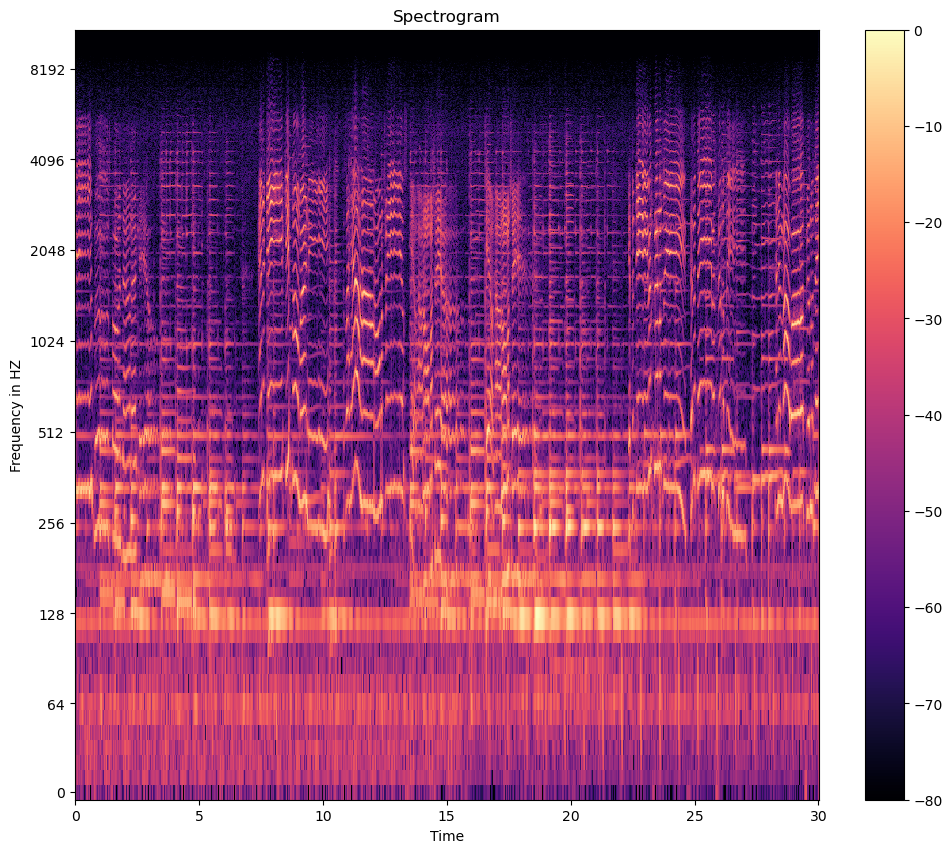

In [22]:
decibel = librosa.amplitude_to_db(stft, ref = np.max)

plt.figure(figsize = (12, 10))
librosa.display.specshow(decibel, sr = frequency, hop_length = hl, x_axis = 'time', y_axis = 'log')
plt.colorbar();
plt.title("Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency in HZ")


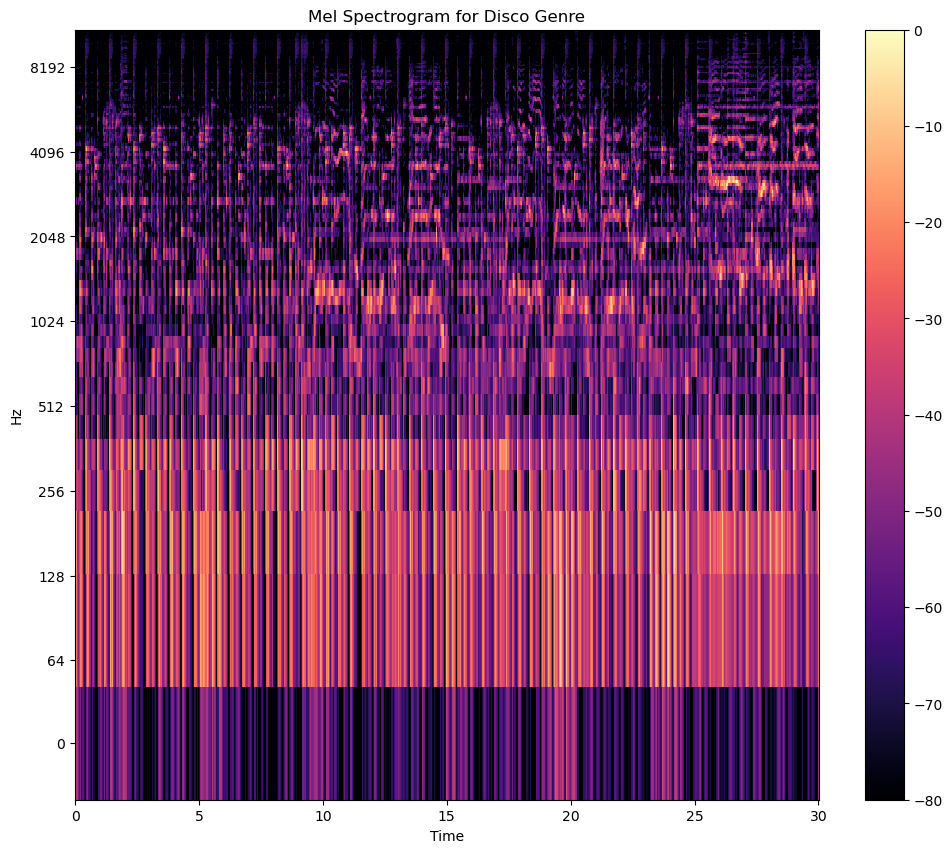

In [27]:
# Load an audio file
y, s = librosa.load(f'{dir_}/genres_original/disco/disco.00018.wav')
# Trim the audio signal
y, z = librosa.effects.trim(y)

# Compute the mel spectrogram
mel = librosa.feature.melspectrogram(y=y, sr=s)
# Convert to dB scale
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
# Plot the mel spectrogram
plt.figure(figsize = (12, 10))
librosa.display.specshow(mel_db, sr=s, hop_length=hl, x_axis = 'time', y_axis = 'log');
plt.colorbar();
plt.title("Mel Spectrogram for Disco Genre");


In [28]:
zero_cross = librosa.zero_crossings(y, pad=False)

Sound waves in Blue is Harmonic and Red is Percussive


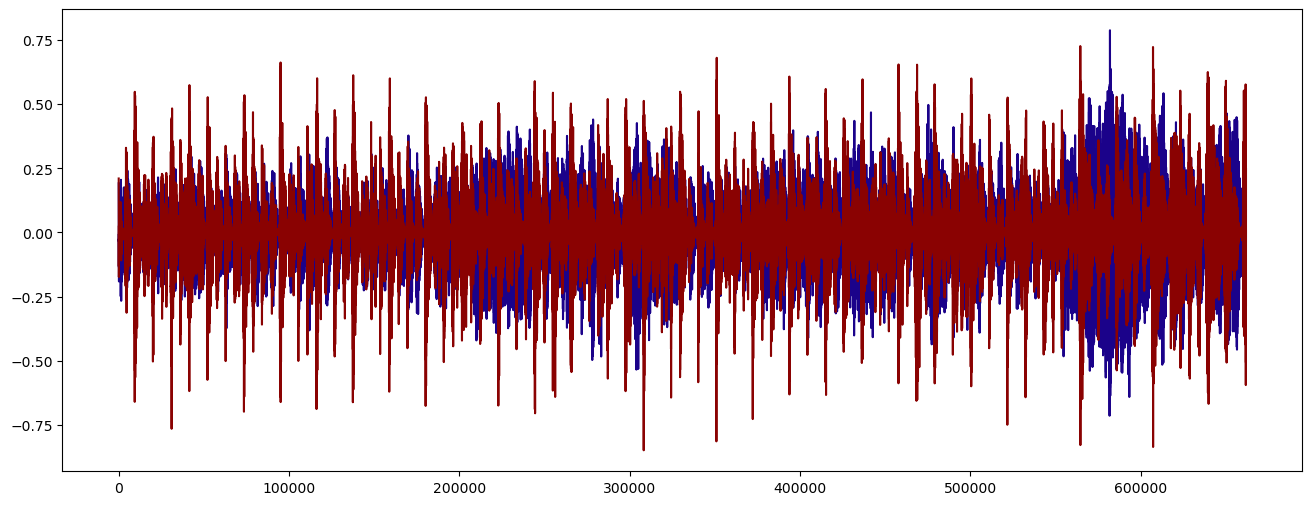

In [29]:
y_harm, y_perc = librosa.effects.hpss(y)
print('Sound waves in Blue is Harmonic and Red is Percussive')
plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#1b028a');
plt.plot(y_perc, color = '#8a0202');

In [32]:
# Compute the spectral centroid of the audio signal
sc = librosa.feature.spectral_centroid(y=y, sr=s)[0]
# Print the spectral centroid values
print('Centroids:', sc, '\n')
# Print the shape of the spectral centroids
print('Shape of Spectral Centroids:', sc.shape, '\n')
# Explanation of spectral centroid
print('The spectral centroid is a measure used in digital signal processing to characterise a spectrum.')
print('It indicates where the center of mass of the spectrum is located.') 
print('Perceptually, it has a robust connection with the impression of brightness of a sound. It is sometimes called center of spectral mass')
# Create an array of frame indices
frames = range(len(sc))

# Convert frame indices to time in seconds
t = librosa.frames_to_time(frames)

# Print frame indices and their corresponding times
print('frames:', frames, '\n')
print('t:', t)
# Define a function to normalize data using min-max scaling
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)


Centroids: [2407.30709235 2350.41493654 2508.90082633 ... 3193.13673691 2885.57970844
 2699.12401944] 

Shape of Spectral Centroids: (1293,) 

The spectral centroid is a measure used in digital signal processing to characterise a spectrum.
It indicates where the center of mass of the spectrum is located.
Perceptually, it has a robust connection with the impression of brightness of a sound. It is sometimes called center of spectral mass
frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


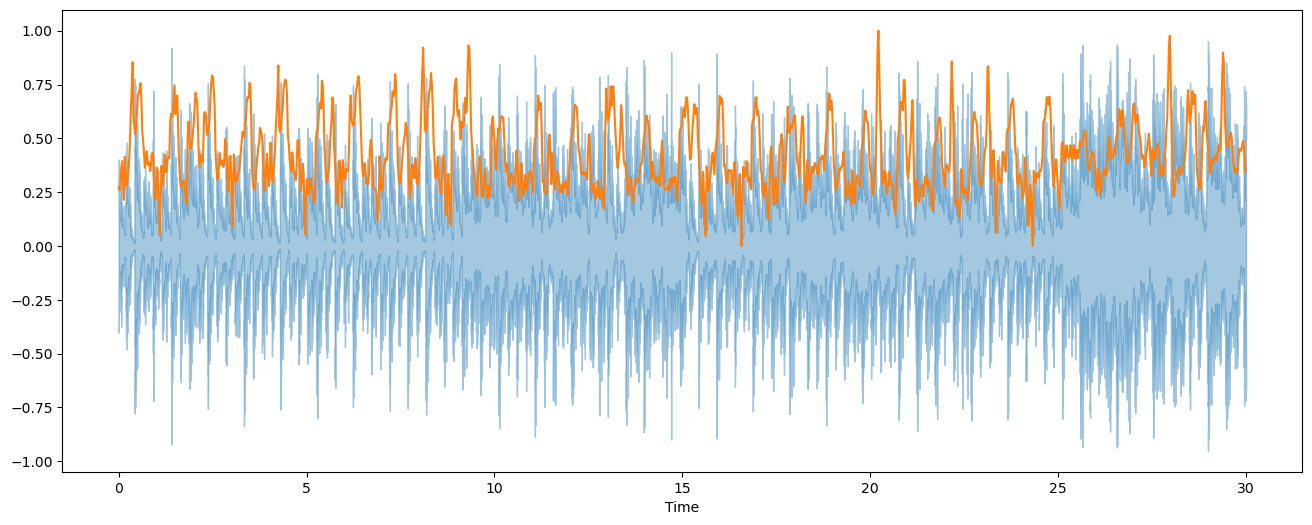

In [35]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y, sr=s, alpha=0.4)
plt.plot(t, normalize(sc))


Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.


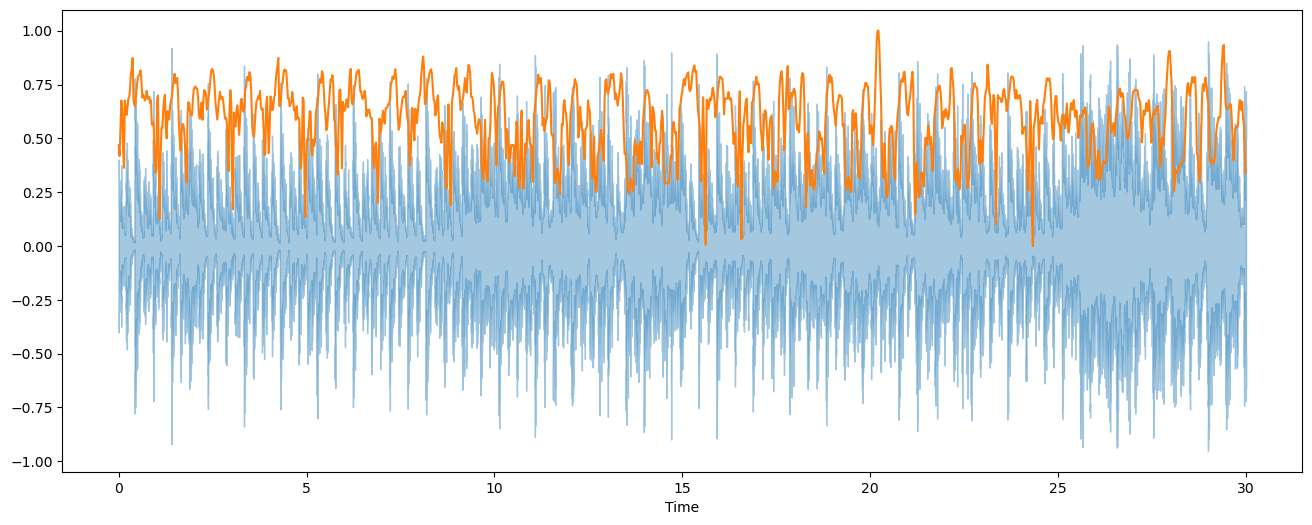

In [37]:
spectral_r = librosa.feature.spectral_rolloff(y=y, sr=s)[0]
print('Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.')
# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y, sr=s, alpha=0.4);
plt.plot(t, normalize(spectral_r));

(20, 1293)


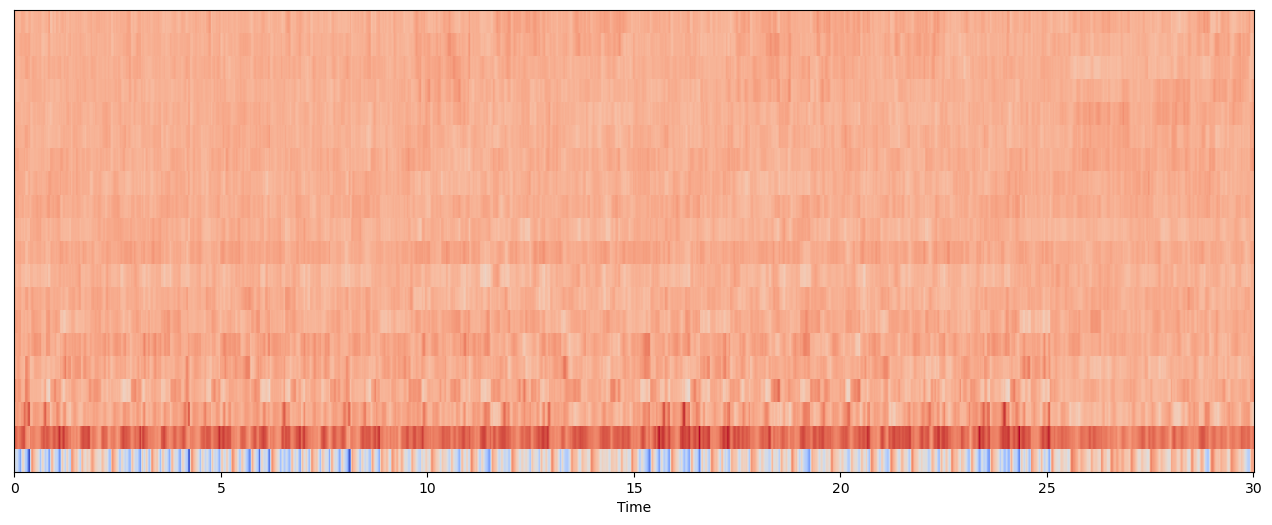

In [38]:
mfcc = librosa.feature.mfcc(y=y, sr=s)
print(mfcc.shape)

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfcc, sr=s, x_axis='time');

Mean: 2.360215e-09 

Var: 1.0


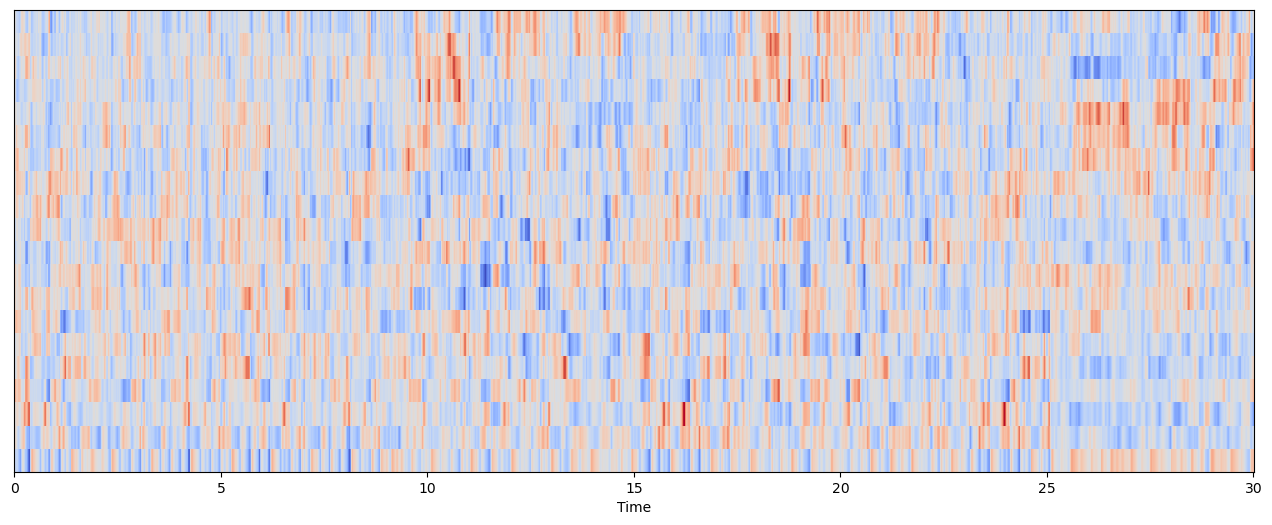

In [40]:
import warnings
warnings.filterwarnings("ignore")
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
print('Mean:', mfcc.mean(), '\n')
print('Var:', mfcc.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfcc, sr=s, x_axis='time');

Chromogram shape: (12, 133)


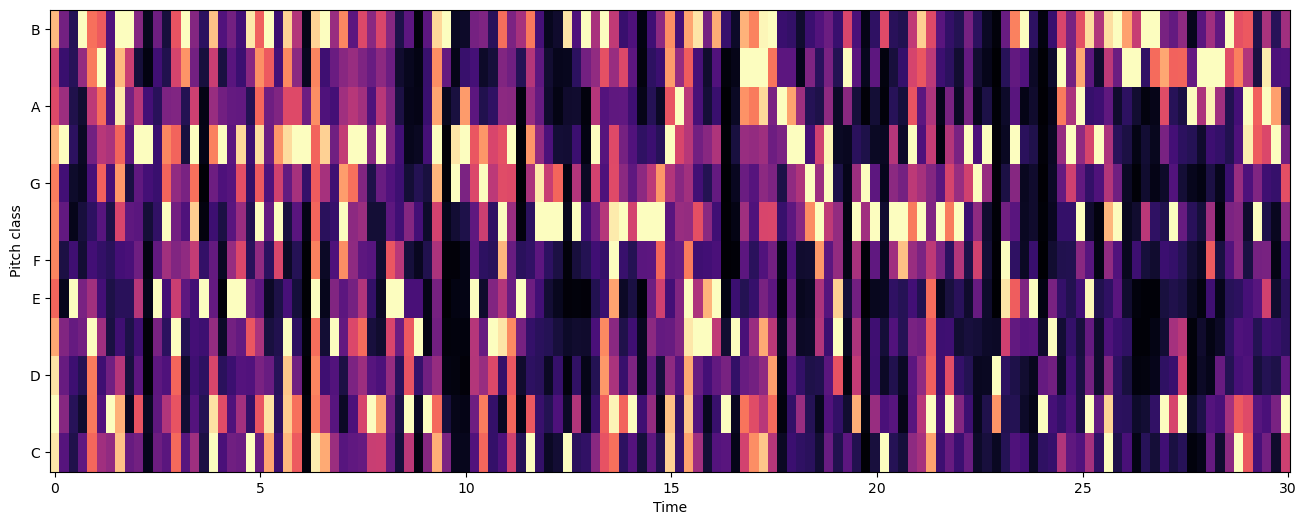

In [42]:
hl = 5000

chromagram = librosa.feature.chroma_stft(y=y, sr=s, hop_length=hl)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hl);

In [43]:
data_30sec = pd.read_csv(f'{dir_}/features_30_sec.csv')
data_30sec.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

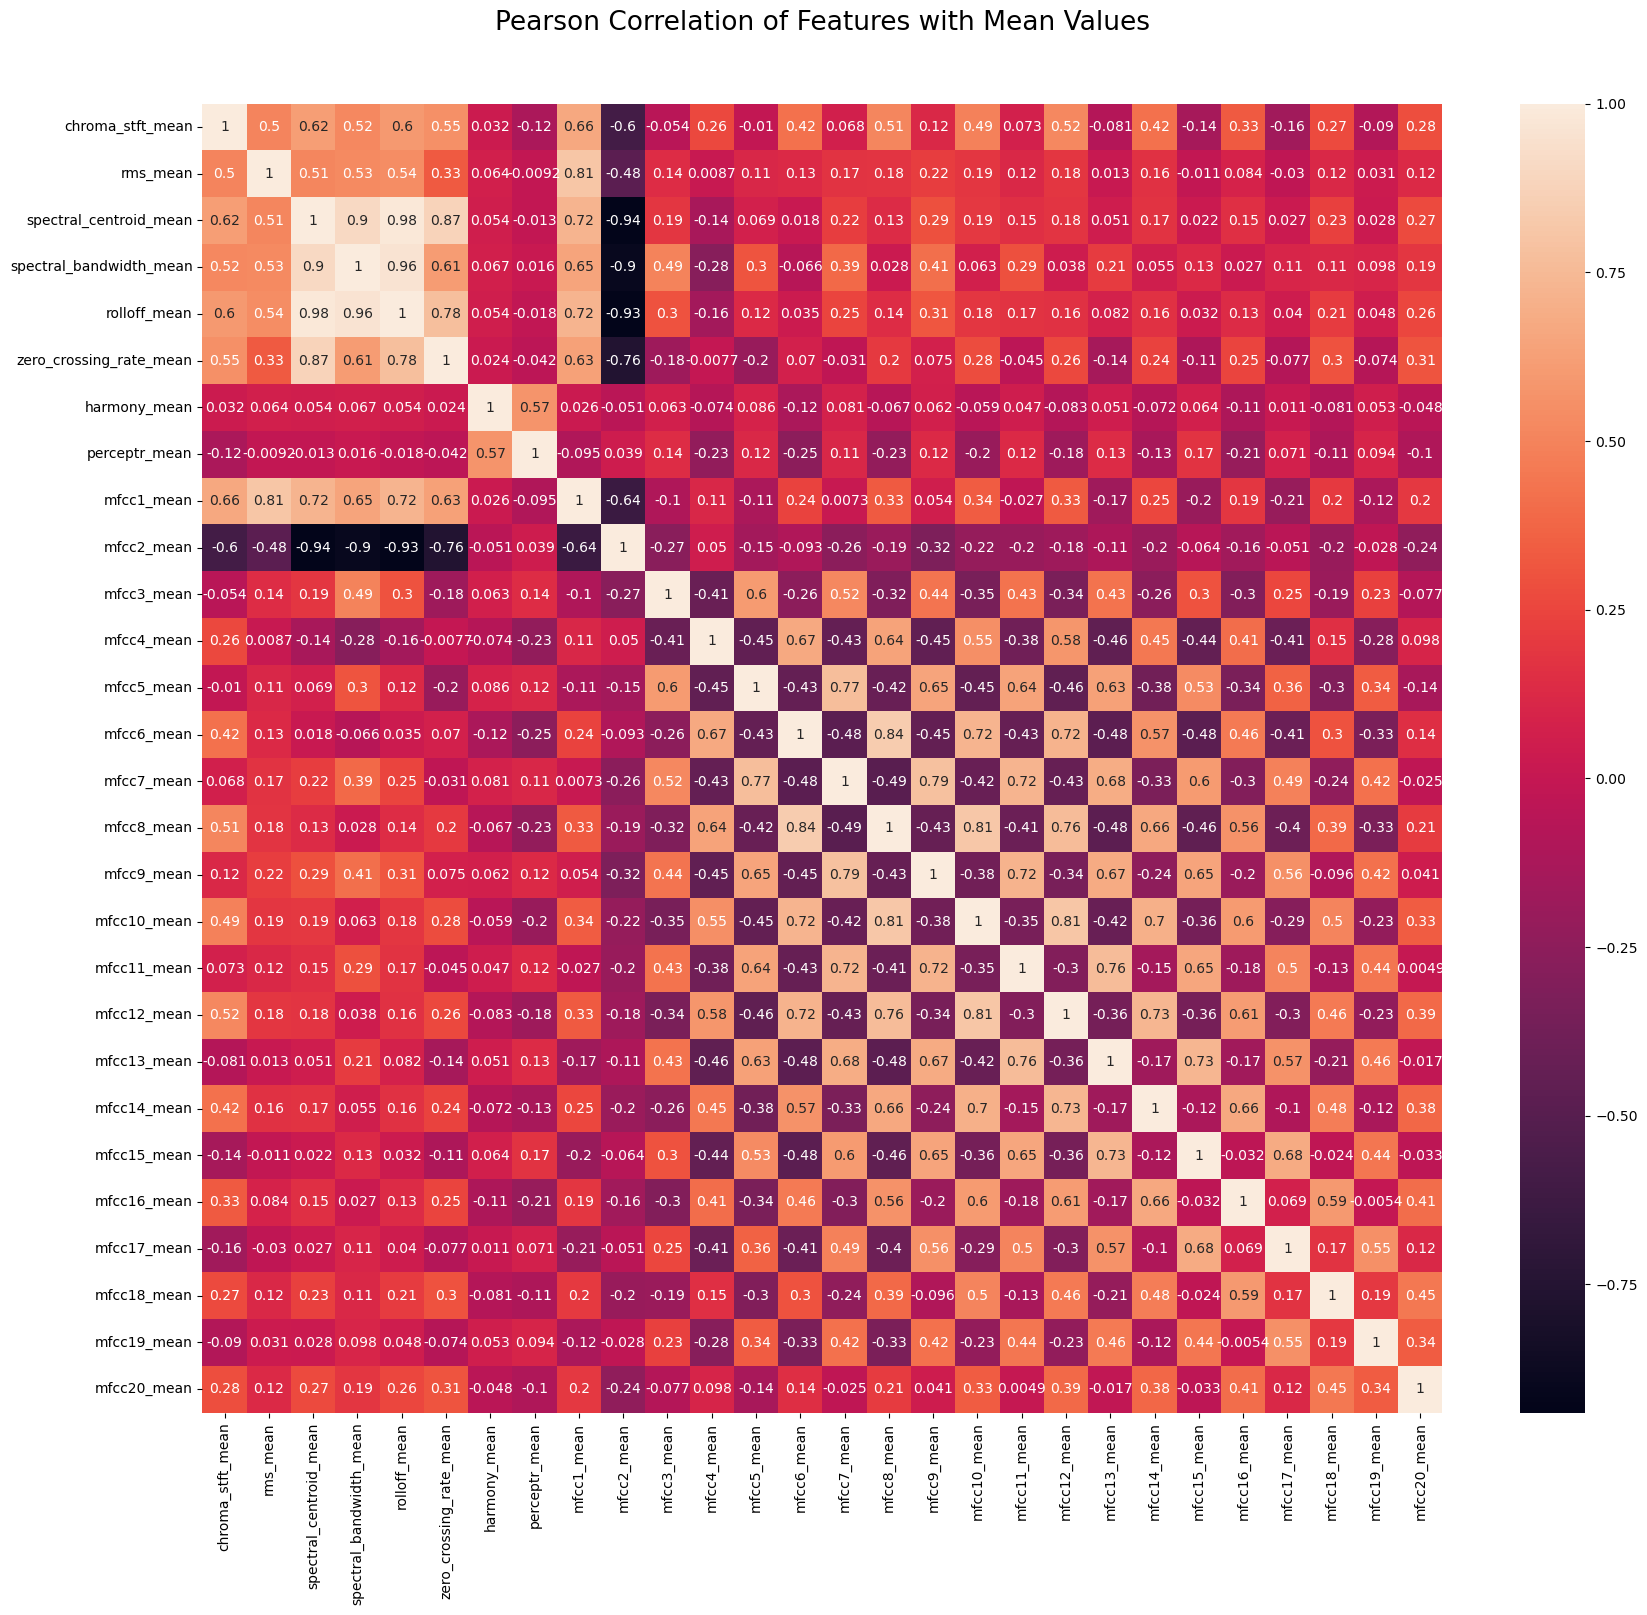

In [44]:
spike = [col for col in data_30sec.columns if 'mean' in col]
corr = data_30sec[spike].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 17));
plt.title('Pearson Correlation of Features with Mean Values', y=1.05, size=19)
sns.heatmap(corr,annot=True)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

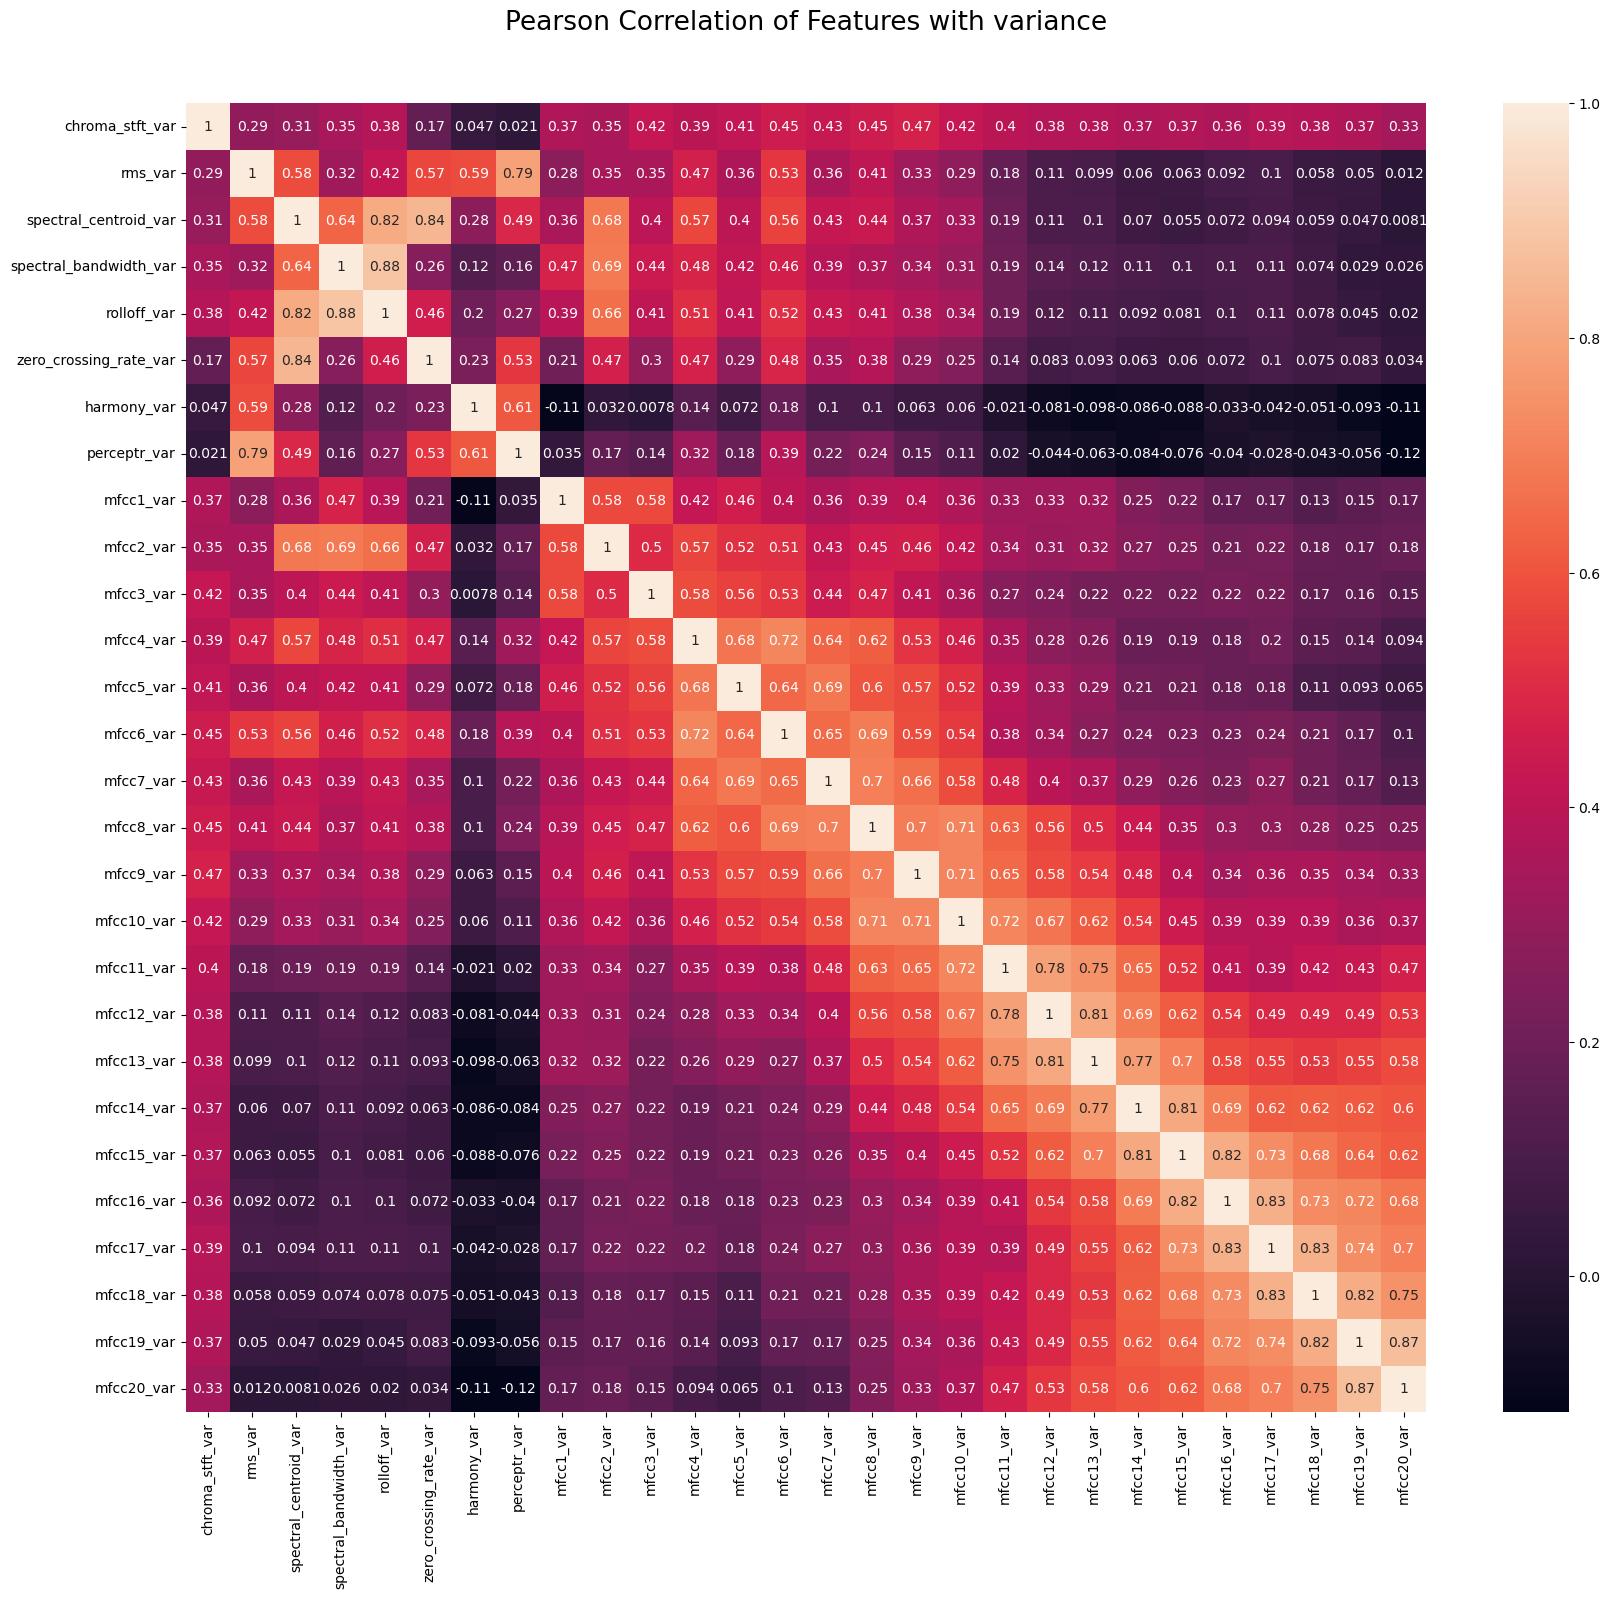

In [45]:
spike = [col for col in data_30sec.columns if 'var' in col]
corr = data_30sec[spike].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 17));
colormap = plt.cm.viridis
plt.title('Pearson Correlation of Features with variance', y=1.05, size=19)
sns.heatmap(corr,annot=True)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

In [46]:
data_30sec = data_30sec.iloc[0:, 1:]
y = data_30sec['label']
X = data_30sec.loc[:, data_30sec.columns != 'label']

cols = X.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [47]:
df_3sec = pd.read_csv(f'{dir_}/features_3_sec.csv')
df_3sec = df_3sec.iloc[0:, 1:]
df_3sec.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [48]:
df_3sec.shape


(9990, 59)

In [49]:
y = df_3sec['label']
X = df_3sec.loc[:, df_3sec.columns != 'label']
# Breaking Up  X and Y   Independent  and Target Variables )

# MinMAX Scaling implementation:
cols = X.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [55]:
model = MLPClassifier(hidden_layer_sizes=(5000,10), activation='relu', alpha=1e-5,solver='lbfgs')
model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5000, 10), solver='lbfgs')

In [56]:
model1 = RandomForestClassifier(n_estimators=1000)
model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [57]:
preds = model1.predict(X_test)

In [58]:
print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

Accuracy : 0.87855 



In [61]:
model3=LogisticRegression()
model3.fit(X_train, y_train)

LogisticRegression()

In [62]:
preds = model3.predict(X_test)

In [63]:
print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

Accuracy : 0.6977 



In [64]:
def scaling(i):
    time = []
    N=[]
    n=1
    while n<=i:
        from time import sleep, perf_counter
        from threading import Thread
        def MLP():
            model = MLPClassifier(hidden_layer_sizes=(5000,10), activation='relu', alpha=1e-5,solver='lbfgs')
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            print(f'Accuracy_MLP FOR N = {n}', ':', round(accuracy_score(y_test, preds), 5), '\n')
            sleep(1)
            #print('done')
    
        def RF():
            model1 = RandomForestClassifier()
            model1.fit(X_train, y_train)
            preds1 = model1.predict(X_test)
            print(f'Accuracy_RF FOR N = {n}', ':', round(accuracy_score(y_test, preds1), 5), '\n')
            sleep(1)
            #print('done')
    
        def LogReg():
            model2 = LogisticRegression(max_iter=10000)
            model2.fit(X_train, y_train)
            preds2 = model2.predict(X_test)
            print(f'Accuracy_LR FOR N = {n}', ':', round(accuracy_score(y_test, preds2), 5), '\n')
            sleep(1)
           # print('done')


        start_time = perf_counter()

        # create two new threads
        t1 = Thread(target=MLP)
        t2 = Thread(target=RF)
        t3 = Thread(target=LogReg)

        # start the threads
        t1.start()
        t2.start()
        t3.start()

        # wait for the threads to complete
        t1.join()
        t2.join()
        t3.join()

        end_time = perf_counter()
        time_taken = end_time- start_time
        
        print(f'It took {time_taken: 0.2f} second(s) to complete for N = {n}')
        N.append(n)
        time.append(time_taken)
        n=n+1
        

In [65]:
scaling(10)

Accuracy_LR FOR N = 1 : 0.6957 

Accuracy_RF FOR N = 1 : 0.86153 

Accuracy_MLP FOR N = 1 : 0.69469 

It took  222.76 second(s) to complete for N = 1
Accuracy_LR FOR N = 2 : 0.6957 

Accuracy_RF FOR N = 2 : 0.8652 

Accuracy_MLP FOR N = 2 : 0.63463 

It took  229.53 second(s) to complete for N = 2
Accuracy_LR FOR N = 3 : 0.6957 

Accuracy_RF FOR N = 3 : 0.8622 

Accuracy_MLP FOR N = 3 : 0.64131 

It took  234.64 second(s) to complete for N = 3
Accuracy_LR FOR N = 4 : 0.6957 

Accuracy_RF FOR N = 4 : 0.8682 

Accuracy_MLP FOR N = 4 : 0.61828 

It took  229.36 second(s) to complete for N = 4
Accuracy_LR FOR N = 5 : 0.6957 

Accuracy_RF FOR N = 5 : 0.8672 

Accuracy_MLP FOR N = 5 : 0.61428 

It took  226.03 second(s) to complete for N = 5
Accuracy_LR FOR N = 6 : 0.6957 

Accuracy_RF FOR N = 6 : 0.86386 

Accuracy_MLP FOR N = 6 : 0.6997 

It took  229.14 second(s) to complete for N = 6
Accuracy_LR FOR N = 7 : 0.6957 

Accuracy_RF FOR N = 7 : 0.86086 

Accuracy_MLP FOR N = 7 : 0.60928 

It 

In [66]:
time

CPU times: user 4 µs, sys: 2 µs, total: 6 µs
Wall time: 15 µs


In [67]:
def scaling_SERIAL(i):
    time = []
    N=[]
    n=1
    while n<=i:
        from time import sleep, perf_counter
        from threading import Thread
        def MLP():
            model = MLPClassifier(hidden_layer_sizes=(5000,10), activation='relu', alpha=1e-5,solver='lbfgs')
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
            print(f'Accuracy_MLP FOR N = {n}', ':', round(accuracy_score(y_test, preds), 5), '\n')
            sleep(1)
            #print('done')
    
        def RF():
            model1 = RandomForestClassifier()
            model1.fit(X_train, y_train)
            preds1 = model1.predict(X_test)
            print(f'Accuracy_RF FOR N = {n}', ':', round(accuracy_score(y_test, preds1), 5), '\n')
            sleep(1)
            #print('done')
    
        def LogReg():
            model2 = LogisticRegression(max_iter=10000)
            model2.fit(X_train, y_train)
            preds2 = model2.predict(X_test)
            print(f'Accuracy_LR FOR N = {n}', ':', round(accuracy_score(y_test, preds2), 5), '\n')
            sleep(1)
           # print('done')


        start_time = perf_counter()

        MLP()
        RF()
        LogReg()
        end_time = perf_counter()
        time_taken = end_time- start_time
        
        print(f'It took {time_taken: 0.2f} second(s) to complete for N = {n}')
        N.append(n)
        time.append(time_taken)
        n=n+1


In [68]:
scaling_SERIAL(10)

Accuracy_MLP FOR N = 1 : 0.63997 

Accuracy_RF FOR N = 1 : 0.86486 

Accuracy_LR FOR N = 1 : 0.6957 

It took  252.43 second(s) to complete for N = 1
Accuracy_MLP FOR N = 2 : 0.67234 

Accuracy_RF FOR N = 2 : 0.86453 

Accuracy_LR FOR N = 2 : 0.6957 

It took  248.09 second(s) to complete for N = 2
Accuracy_MLP FOR N = 3 : 0.56423 

Accuracy_RF FOR N = 3 : 0.86687 

Accuracy_LR FOR N = 3 : 0.6957 

It took  236.98 second(s) to complete for N = 3
Accuracy_MLP FOR N = 4 : 0.08909 

Accuracy_RF FOR N = 4 : 0.86453 

Accuracy_LR FOR N = 4 : 0.6957 

It took  18.68 second(s) to complete for N = 4
Accuracy_MLP FOR N = 5 : 0.61161 

Accuracy_RF FOR N = 5 : 0.86019 

Accuracy_LR FOR N = 5 : 0.6957 

It took  239.93 second(s) to complete for N = 5
Accuracy_MLP FOR N = 6 : 0.664 

Accuracy_RF FOR N = 6 : 0.85752 

Accuracy_LR FOR N = 6 : 0.6957 

It took  243.37 second(s) to complete for N = 6
Accuracy_MLP FOR N = 7 : 0.67734 

Accuracy_RF FOR N = 7 : 0.86453 

Accuracy_LR FOR N = 7 : 0.6957 

I

In [69]:
from time import sleep, perf_counter
from threading import Thread


def MLP():
    model = MLPClassifier(hidden_layer_sizes=(5000,10), activation='relu', alpha=1e-5,solver='lbfgs')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print('Accuracy_MLP', ':', round(accuracy_score(y_test, preds), 5), '\n')
    sleep(1)
    print('done')
    
def RF():
    model1 = RandomForestClassifier()
    model1.fit(X_train, y_train)
    preds1 = model1.predict(X_test)
    print('Accuracy_RF', ':', round(accuracy_score(y_test, preds1), 5), '\n')
    sleep(1)
    print('done')
    
def LogReg():
    model2 = LogisticRegression()
    model2.fit(X_train, y_train)
    preds2 = model2.predict(X_test)
    print('Accuracy_LR', ':', round(accuracy_score(y_test, preds2), 5), '\n')
    sleep(1)
    print('done')


start_time = perf_counter()
MLP()
RF()
LogReg()
end_time = perf_counter()

print(f'It took {end_time- start_time: 0.2f} second(s) to complete.')


Accuracy_MLP : 0.70804 

done
Accuracy_RF : 0.86453 

done
Accuracy_LR : 0.6977 

done
It took  243.75 second(s) to complete.


In [76]:
def predict_Genre(song):
    y, s = librosa.load(song)
    trim_y, _ = librosa.effects.trim(y)
    chroma_stft = librosa.feature.chroma_stft(y=trim_y, sr=s,n_fft=2048, hop_length=512).flatten()
    rmse = librosa.feature.rms(y=trim_y, frame_length=2048, hop_length=512).flatten()  
    spec_cent = librosa.feature.spectral_centroid(y=trim_y, sr=s, n_fft=2048,hop_length=512).flatten()
    spec_bw = librosa.feature.spectral_bandwidth(y=trim_y, sr=s,n_fft=2048, hop_length=512).flatten()
    rolloff = librosa.feature.spectral_rolloff(y=trim_y + 0.01, sr=s,n_fft=2048, hop_length=512).flatten()
    zcr = librosa.feature.zero_crossing_rate(trim_y,frame_length=2048, hop_length=512).flatten()
    y_harmonic, y_percep = librosa.effects.hpss(trim_y)
    tempo,beats = librosa.beat.beat_track(y=y, sr = s)
    mfcc = librosa.feature.mfcc(y=trim_y, sr=s,win_length=2048, hop_length=512)
    mfcc_mean=mfcc.T.mean(axis=0)
    mfcc_var=mfcc.T.var(axis=0)

    length=y.shape[0]
    chroma_stft_mean=chroma_stft.mean()
    chroma_stft_var=chroma_stft.var()
    rms_mean=rmse.mean()
    rms_var=rmse.var()
    spectral_centroid_mean=spec_cent.mean()
    spectral_centroid_var=spec_cent.var()
    spectral_bandwidth_mean=spec_bw.mean()
    spectral_bandwidth_var=spec_bw.var()
    rolloff_mean=rolloff.mean()
    rolloff_var=rolloff.var()
    zero_crossing_rate_mean=zcr.mean()
    zero_crossing_rate_var=zcr.var()
    harmony_mean=y_harmonic.mean()
    harmony_var=y_harmonic.var()
    perceptr_mean=y_percep.mean()
    perceptr_var=y_percep.var()
    mfcc1_mean=mfcc_mean[0]
    mfcc1_var=mfcc_var[0]
    mfcc2_mean=mfcc_mean[1]
    mfcc2_var=mfcc_var[1]
    mfcc3_mean=mfcc_mean[2]
    mfcc3_var=mfcc_var[2]
    mfcc4_mean=mfcc_mean[3]
    mfcc4_var=mfcc_var[3]
    mfcc5_mean=mfcc_mean[4]
    mfcc5_var=mfcc_var[4]
    mfcc6_mean=mfcc_mean[5]
    mfcc6_var=mfcc_var[5]
    mfcc7_mean=mfcc_mean[6]
    mfcc7_var=mfcc_var[6]
    mfcc8_mean=mfcc_mean[7]
    mfcc8_var=mfcc_var[7]
    mfcc9_mean=mfcc_mean[8]
    mfcc9_var=mfcc_var[8]
    mfcc10_mean=mfcc_mean[9]
    mfcc10_var=mfcc_var[9]
    mfcc11_mean=mfcc_mean[10]
    mfcc11_var=mfcc_var[10]
    mfcc12_mean=mfcc_mean[11]
    mfcc12_var=mfcc_var[11]
    mfcc13_mean=mfcc_mean[12]
    mfcc13_var=mfcc_var[12]
    mfcc14_mean=mfcc_mean[13]
    mfcc14_var=mfcc_var[13]
    mfcc15_mean=mfcc_mean[14]
    mfcc15_var=mfcc_var[14]
    mfcc16_mean=mfcc_mean[15]
    mfcc16_var=mfcc_var[15]
    mfcc17_mean=mfcc_mean[16]
    mfcc17_var=mfcc_var[16]
    mfcc18_mean=mfcc_mean[17]
    mfcc18_var=mfcc_var[17]
    mfcc19_mean=mfcc_mean[18]
    mfcc19_var=mfcc_var[18]
    mfcc20_mean=mfcc_mean[19]
    mfcc20_var=mfcc_var[19]
    feature_array=np.array([length, chroma_stft_mean, chroma_stft_var, rms_mean, rms_var,
           spectral_centroid_mean, spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var, 
               rolloff_mean,rolloff_var,zero_crossing_rate_mean, zero_crossing_rate_var,
           harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,
           mfcc1_mean, mfcc1_var, mfcc2_mean,mfcc2_var,mfcc3_mean,
           mfcc3_var,mfcc4_mean, mfcc4_var, mfcc5_mean, mfcc5_var,
           mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,
           mfcc8_var, mfcc9_mean, mfcc9_var,mfcc10_mean,mfcc10_var,
           mfcc11_mean,mfcc11_var, mfcc12_mean,mfcc12_var,mfcc13_mean,
           mfcc13_var, mfcc14_mean, mfcc14_var, mfcc15_mean, mfcc15_var,
           mfcc16_mean, mfcc16_var, mfcc17_mean, mfcc17_var, mfcc18_mean,
           mfcc18_var,mfcc19_mean, mfcc19_var, mfcc20_mean, mfcc20_var])
    song_test=feature_array.reshape(1,-1)
    Song = pd.DataFrame(song_test, columns = ['length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var'])
    pred=model1.predict(Song)
    print(pred[0])
    return ipd.Audio(song)
    

In [77]:
song=f'{dir_}/genres_original/blues/blues.00012.wav'
predict_Genre(song)

rock


In [78]:
y_test.value_counts()

blues        319
reggae       316
hiphop       311
classical    308
metal        303
disco        301
rock         300
jazz         286
country      286
pop          267
Name: label, dtype: int64

In [79]:
df = pd.read_csv(f'{dir_}/features_30_sec.csv', index_col='filename')

labels = df[['label']]

df = df.drop(columns=['length','label'])
df

scaled=preprocessing.scale(df)
print('Scaled data type:', type(scaled))

Scaled data type: <class 'numpy.ndarray'>


In [ ]:
similarity = cosine_similarity(scaled)
print("Similarity shape:", similarity.shape)

sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names
def find_similar_songs(name):
    series = sim_df_names[name].sort_values(ascending = False)
    series = series.drop(name)
    print("\n**************************************************\n Top 5 Recommended songs if you like:-", name)
    print(series.head(5))
    

In [86]:
find_similar_songs('jazz.00038.wav') 

ipd.Audio(f'{dir_}/genres_original/jazz/jazz.00038.wav')


**************************************************
 Top 5 Recommended songs if you like:- jazz.00038.wav
filename
jazz.00062.wav     0.765004
jazz.00012.wav     0.705639
rock.00064.wav     0.652775
metal.00092.wav    0.650117
blues.00002.wav    0.636583
Name: jazz.00038.wav, dtype: float64
